# Slope Fields
Code to render slope field

**To evalute cells, type shift + enter.**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Define the differential equation
def dydt(t, y):
    return

# Create a grid of t and y values
t     = np.linspace(-5, 5, 20)
y     = np.linspace(-5, 5, 20)
[T,Y] = np.meshgrid(t, y)

# Calculate the slopes at each point defined by dy/dt = f(t,y)
slopes = dydx(T, Y)

# Normalize the vectors to have uniform length
dt = np.ones(slopes.shape)
dy = slopes
# Normalize the vectors
magnitude = np.sqrt(dt**2 + dy**2)
dt_norm = dt / magnitude
dy_norm = dy / magnitude

plt.figure(figsize=(8, 6))
plt.quiver(T, Y, dt_norm, dy_norm, angles='xy', scale_units='xy', scale=3, color='blue')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.title(r'Slope Field for: $\quad \dfrac{dy}{dt} = t - y$')
plt.grid(True)
plt.show()


# Euler's Method
Python code below performs Euler's Method.

**To evalute cells, type shift + enter.**

In [ ]:
# importing libraries
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [ ]:
# Euler's Method routine for solving Initial Value Problems (IVPs)
# Use with ydot.m to evaluate rhs of differential equation
# Input: interval inter, initial value y0, number of steps n
# Output: time steps t, approximate solution w
# Usage: euler(a,b,y_0,n)
# Example: euler(0,1,1,10)
def euler(a,b,y0,n):

    # initialize/define
    t    = np.zeros(n+1) # independent var
    w    = np.zeros(n+1) # dependent var
    h    =               # step size
    w[0] =               # initial condition

    for i in range(1,n+1):
        t[i] = t[i-1] + h
        w[i] = w[i-1] + h*
    return t,w

# RHS of Differential Equation
def f(t,y):
    ydot =
    return ydot


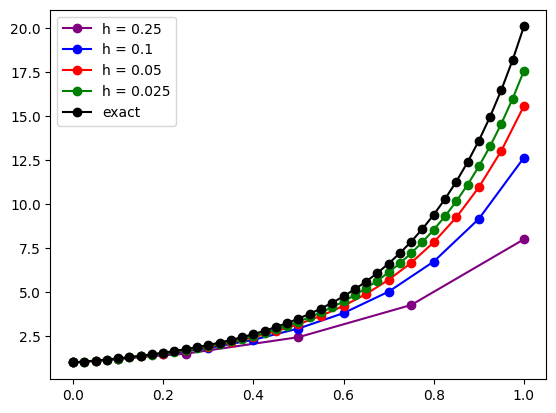

In [ ]:
# evaluation of euler's method for decreasing values of step size h
# and corresponding plots.
[t,w]   = euler(a,b,y0,n)

plt.plot(t4,w4,'-o',color='purple',label = "h = 0.25")
plt.plot(t10,w10,'-o',color='blue',label = "h = 0.1")

y_exact =
plt.plot(t40,y,'-o',color='black',label = "exact")
plt.legend()

Text(0, 0.5, '$|y(b) - w_{n}|$ (error)')

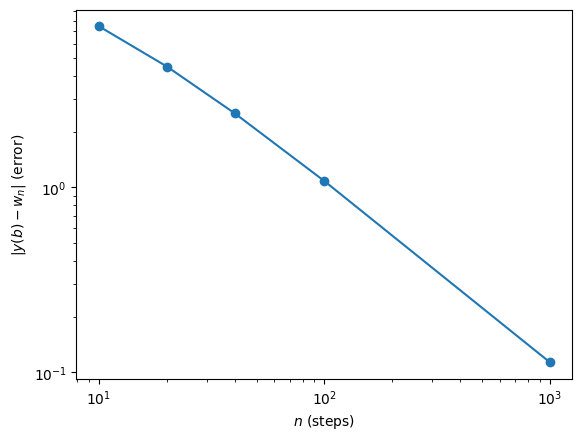

In [ ]:
# Error e at t = b for decreasing (increasing) h (n).
w1 = [w10[-1], w20[-1], w40[-1], w100[-1], w1000[-1]]
e = np.abs(y[-1] - w1)
n = [10,20,40,100,1000]
p = plt.loglog(n,e,'-o')
plt.xlabel(r'$n$ (steps)')
plt.ylabel(r'$|y(b) - w_{n}|$ (error)')

HW----

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def slope_field(f, tmin=-2, tmax=2, ymin=-3, ymax=3, density=21):
    t = np.linspace(tmin, tmax, density)
    y = np.linspace(ymin, ymax, density)
    T, Y = np.meshgrid(t, y)

    dY = f(T, Y)
    dT = np.ones_like(dY)

    # normalize so arrows are similar length
    M = np.sqrt(dT**2 + dY**2)
    dT = dT / M
    dY = dY / M

    plt.figure(figsize=(7,5))
    plt.quiver(T, Y, dT, dY, angles="xy")
    plt.xlim(tmin, tmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid(True)

def plot_solutions(t, curves, labels):
    for yvals, lab in zip(curves, labels):
        plt.plot(t, yvals, label=lab)
    plt.legend()


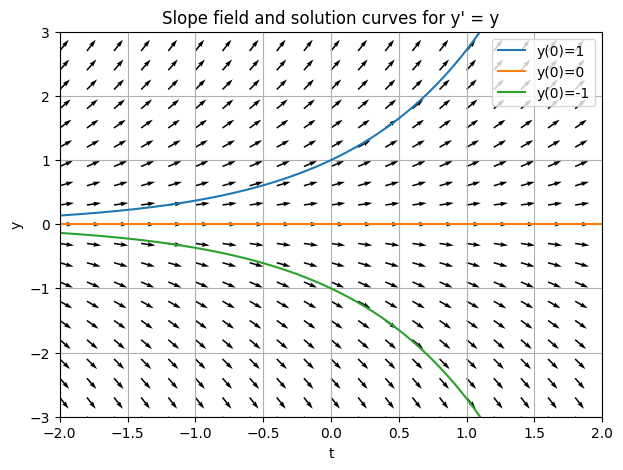

In [11]:
f = lambda t, y: y
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [np.exp(t), np.zeros_like(t), -np.exp(t)]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = y")
plt.show()


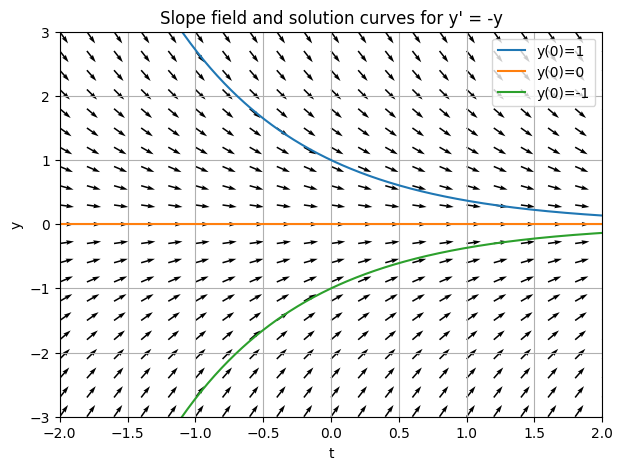

In [12]:
f = lambda t, y: -y
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [np.exp(-t), np.zeros_like(t), -np.exp(-t)]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = -y")
plt.show()


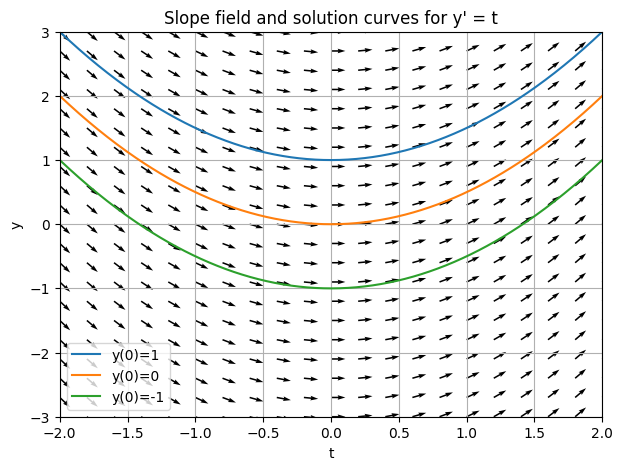

In [13]:
f = lambda t, y: t
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [1 + 0.5*t**2, 0.5*t**2, -1 + 0.5*t**2]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = t")
plt.show()


5(c) Check with Python

In [14]:
import numpy as np
import math

def euler_path(h, t0=0.0, y0=1.0, tf=1.0):
    f = lambda t, y: 2*(t+1)*y
    n = int(round((tf - t0)/h))
    t = t0
    w = y0
    ts = [t]
    ws = [w]
    for _ in range(n):
        w = w + h*f(t, w)
        t = t + h
        ts.append(t)
        ws.append(w)
    return np.array(ts), np.array(ws)

ts, ws = euler_path(0.25)
print("t:", ts)
print("w:", ws)
print("w(1):", ws[-1], " exact:", math.exp(3), " error:", abs(math.exp(3)-ws[-1]))


t: [0.   0.25 0.5  0.75 1.  ]
w: [1.         1.5        2.4375     4.265625   7.99804688]
w(1): 7.998046875  exact: 20.085536923187668  error: 12.087490048187668


5(d) One plot: Euler solutions

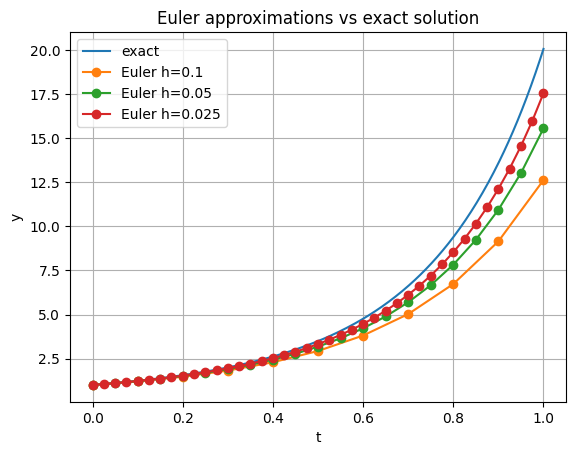

In [15]:
def euler_path(h, t0=0.0, y0=1.0, tf=1.0):
    f = lambda t, y: 2*(t+1)*y
    n = int(round((tf - t0)/h))
    t = t0
    w = y0
    ts = [t]
    ws = [w]
    for _ in range(n):
        w = w + h*f(t, w)
        t = t + h
        ts.append(t)
        ws.append(w)
    return np.array(ts), np.array(ws)

def y_exact(t):
    return np.exp(t**2 + 2*t)

hs = [0.1, 0.05, 0.025]

t_fine = np.linspace(0, 1, 400)
plt.plot(t_fine, y_exact(t_fine), label="exact")

for h in hs:
    t, w = euler_path(h)
    plt.plot(t, w, marker="o", label=f"Euler h={h}")

plt.xlabel("t")
plt.ylabel("y")
plt.title("Euler approximations vs exact solution")
plt.grid(True)
plt.legend()
plt.show()

5(e) Log-log plot

h=0.100000, error=7.450301
h=0.050000, error=4.514745
h=0.025000, error=2.519702
h=0.012500, error=1.336677
h=0.006250, error=0.689226
h=0.003125, error=0.350066


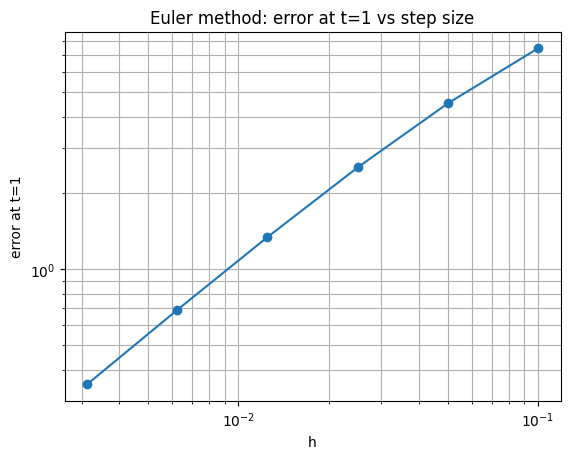

In [16]:

def euler_final(h, t0=0.0, y0=1.0, tf=1.0):
    f = lambda t, y: 2*(t+1)*y
    n = int(round((tf - t0)/h))
    t = t0
    w = y0
    for _ in range(n):
        w = w + h*f(t, w)
        t = t + h
    return w

exact = math.exp(3)

hs = np.array([0.1*(2**(-k)) for k in range(6)])
errors = np.array([abs(exact - euler_final(h)) for h in hs])

for h, e in zip(hs, errors):
    print(f"h={h:.6f}, error={e:.6f}")

plt.loglog(hs, errors, marker="o")
plt.xlabel("h")
plt.ylabel("error at t=1")
plt.title("Euler method: error at t=1 vs step size")
plt.grid(True, which="both")
plt.show()

6(c) Python: implement trap() (explicit trapezoid)

In [18]:
def trap(f, t0, y0, h, n):

    t = np.zeros(n + 1)
    w = np.zeros(n + 1)
    t[0] = t0
    w[0] = y0

    for i in range(n):
        k1 = f(t[i], w[i])
        w_pred = w[i] + h * k1
        k2 = f(t[i] + h, w_pred)
        w[i+1] = w[i] + (h/2) * (k1 + k2)
        t[i+1] = t[i] + h

    return t, w